In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.Pclass.unique()

array([3, 1, 2])

In [8]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train_data[(train_data.Sex == 'male')].Pclass.value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [10]:
train_data[train_data.Sex == 'female'].Pclass.value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [11]:
age_train = train_data.groupby(['Sex','Pclass'])['Age'].mean()
age_train

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [12]:
train_data['Age'][(train_data.Sex == 'male') & (train_data.Pclass == 3)] = np.where(np.isnan(train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 3)]),
                                                                                    age_train[5],train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 3)])

train_data['Age'][(train_data.Sex == 'male') & (train_data.Pclass == 2)] = np.where(np.isnan(train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 2)]),
                                                                                    age_train[4],train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 2)])

train_data['Age'][(train_data.Sex == 'male') & (train_data.Pclass == 1)] = np.where(np.isnan(train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 1)]),
                                                                                    age_train[3],train_data.Age[(train_data.Sex == 'male') & (train_data.Pclass == 1)])

In [13]:
train_data['Age'][(train_data.Sex == 'female') & (train_data.Pclass == 3)] = np.where(np.isnan(train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 3)]),
                                                                                    age_train[2],train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 3)])

train_data['Age'][(train_data.Sex == 'female') & (train_data.Pclass == 2)] = np.where(np.isnan(train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 2)]),
                                                                                    age_train[1],train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 2)])

train_data['Age'][(train_data.Sex == 'female') & (train_data.Pclass == 1)] = np.where(np.isnan(train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 1)]),
                                                                                    age_train[0],train_data.Age[(train_data.Sex == 'female') & (train_data.Pclass == 1)])

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
age_test = test_data.groupby(['Sex','Pclass'])['Age'].mean()
age_test

Sex     Pclass
female  1         41.333333
        2         24.376552
        3         23.073400
male    1         40.520000
        2         30.940678
        3         24.525104
Name: Age, dtype: float64

In [16]:
test_data['Age'][(test_data.Sex == 'female') & (test_data.Pclass == 3)] = np.where(np.isnan(test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 3)]),
                                                                                    age_test[2],test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 3)])

test_data['Age'][(test_data.Sex == 'female') & (test_data.Pclass == 2)] = np.where(np.isnan(test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 2)]),
                                                                                    age_test[1],test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 2)])

test_data['Age'][(test_data.Sex == 'female') & (test_data.Pclass == 1)] = np.where(np.isnan(test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 1)]),
                                                                                    age_test[0],test_data.Age[(test_data.Sex == 'female') & (test_data.Pclass == 1)])

In [17]:
test_data['Age'][(test_data.Sex == 'male') & (test_data.Pclass == 3)] = np.where(np.isnan(test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 3)]),
                                                                                    age_test[5],test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 3)])

test_data['Age'][(test_data.Sex == 'male') & (test_data.Pclass == 2)] = np.where(np.isnan(test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 2)]),
                                                                                    age_test[4],test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 2)])

test_data['Age'][(test_data.Sex == 'male') & (test_data.Pclass == 1)] = np.where(np.isnan(test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 1)]),
                                                                                    age_test[3],test_data.Age[(test_data.Sex == 'male') & (test_data.Pclass == 1)])

In [18]:
# check: when the Pclass = 3, the cabin is NaN or not?
train_data[train_data['Cabin'].isnull()].Pclass.value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500
Age,0.039636,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308
SibSp,-0.057527,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000


In [21]:
#Since the NaN value occurs for 3rd Class
test_data.Fare.fillna(test_data[test_data.Pclass == 3].Fare.mean(),inplace=True)

In [22]:
features = ['Pclass', 'Sex', 'Age','Fare']
train = train_data.iloc[:int(len(train_data)*0.75)]
test = train_data.iloc[int(len(train_data)*0.75):]

X_train = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
y_train = train['Survived']
y_test = test['Survived']

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_predicted = clf.predict(X_train)
y_test_predicted = clf.predict(X_test)
print(accuracy_score(y_train,y_train_predicted))
print(accuracy_score(y_test,y_test_predicted))

0.9805389221556886
0.8026905829596412


As we see difeerence between accuracy score of train and test is too high means model is overfitted (because it is accurate for training set but gives large error when we provide test set to the model)

In [24]:
print(classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       141
           1       0.72      0.77      0.74        82

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.81      0.80      0.80       223

[[116  25]
 [ 19  63]]


In [25]:
clf.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Pre-Pruning: Hyperparameter tuning of Decision Tree

In [26]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10,15, 20],
    'criterion': ["gini", "entropy"],
    'min_samples_split' : [1,5,10,15,20,25,30,35,40]
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [28]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 540 candidates, totalling 2160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                         'min_samples_split': [1, 5, 10, 15, 20, 25, 30, 35,
                                               40]},
             scoring='accuracy', verbose=1)

In [29]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [30]:
grid_search.best_score_

0.812874251497006

In [31]:
print(classification_report(y_test,grid_search.best_estimator_.predict(X_test)))
print(confusion_matrix(y_test,grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       141
           1       0.82      0.66      0.73        82

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223

[[129  12]
 [ 28  54]]


### Pre Pruning: Another round of Grid Search

In [32]:
grid_param = {'criterion' : ['gini','entropy'],
             'splitter' : ['best', 'random'],
             'max_depth' : range(2,50,1),
             'min_samples_leaf': range(1,15,1),
             'min_samples_split':range(2,20,1)}

grid_search_2 = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1, scoring='accuracy')
clf_dt_final = grid_search_2.fit(X_train,y_train)

In [33]:
clf_dt_final.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'random'}

In [34]:
print(classification_report(y_test,clf_dt_final.best_estimator_.predict(X_test)))
print(confusion_matrix(y_test,clf_dt_final.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       141
           1       0.77      0.68      0.72        82

    accuracy                           0.81       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.81      0.80       223

[[124  17]
 [ 26  56]]


From the above 2 rounds of Pruning we did not get satisfactory results. So we will try Post - Pruning method.

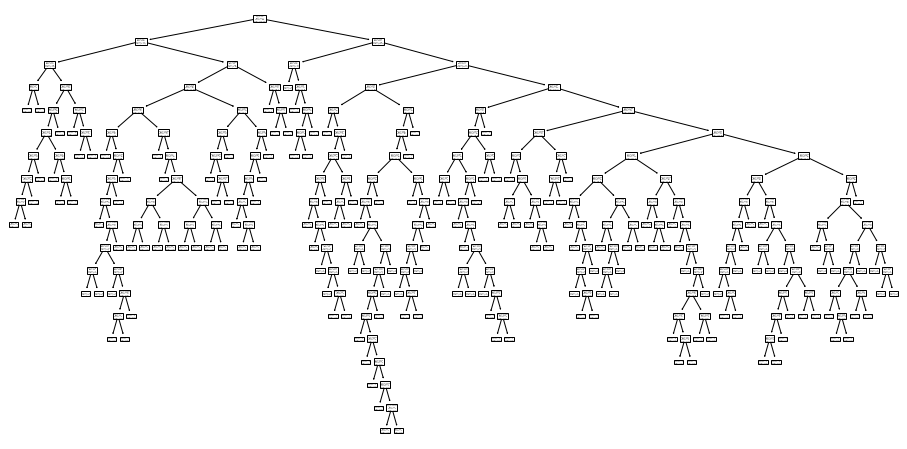

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

### Post Pruning

In [36]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
# path variables gives 2 things ccp_alpha and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('ccp alpha will give list of values :',ccp_alphas)
print('Impurities in Decision Tree :',impurities)


ccp alpha will give list of values : [0.00000000e+00 1.24750499e-04 1.99600798e-04 2.49500998e-04
 2.99401198e-04 4.40295879e-04 4.49101796e-04 4.99001996e-04
 4.99001996e-04 4.99001996e-04 6.69713205e-04 6.98602794e-04
 7.48502994e-04 7.50635481e-04 7.69888794e-04 8.31669993e-04
 8.31669993e-04 1.01582549e-03 1.12275449e-03 1.12275449e-03
 1.13033673e-03 1.14287554e-03 1.19760479e-03 1.19760479e-03
 1.20869372e-03 1.23562399e-03 1.26829674e-03 1.26990601e-03
 1.29538902e-03 1.33067199e-03 1.34730539e-03 1.36091453e-03
 1.37225549e-03 1.43934012e-03 1.45022455e-03 1.47592140e-03
 1.47621424e-03 1.48779364e-03 1.49700599e-03 1.55283838e-03
 1.63876792e-03 1.68413174e-03 1.68892983e-03 1.79813511e-03
 1.85782282e-03 1.92512453e-03 1.96397745e-03 2.24550898e-03
 2.24550898e-03 2.26819089e-03 2.32035928e-03 2.32867598e-03
 2.56629598e-03 2.64177527e-03 2.64927575e-03 2.74451098e-03
 2.80931643e-03 2.99401198e-03 3.00062753e-03 4.18924356e-03
 5.67989205e-03 7.54740519e-03 7.54740519e-03 9.

In [37]:
clfs = [] #will store all the models

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
    

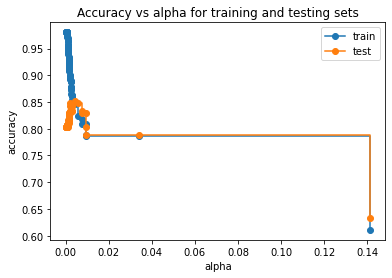

In [38]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

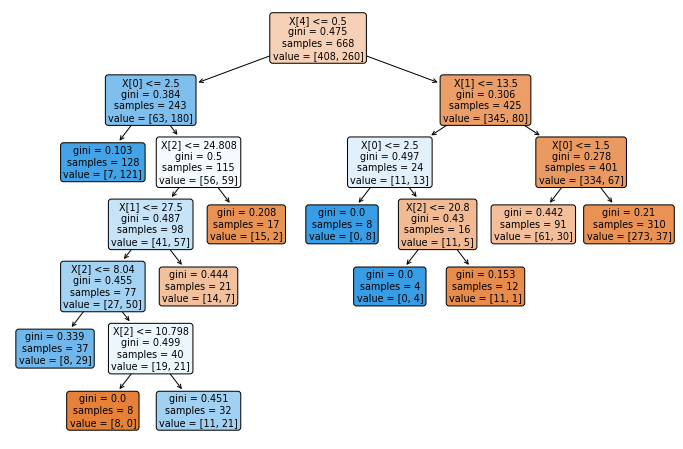

In [39]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [40]:
accuracy_score(y_test,clf.predict(X_test))

0.852017937219731

In [41]:
print(classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       141
           1       0.87      0.71      0.78        82

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.83       223
weighted avg       0.85      0.85      0.85       223

[[132   9]
 [ 24  58]]


We can clearly see there is an improvement in the accuracy score. But, to get better results we will try Random Forest.

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [43]:
print(classification_report(y_test,clf_rf.predict(X_test)))
print(confusion_matrix(y_test,clf_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       141
           1       0.77      0.77      0.77        82

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

[[122  19]
 [ 19  63]]


In [44]:
clf_rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Random Forest is better than the Decision Tree, we wil try **Hyperparameter Tuning**.

In [45]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [50,60,70,None],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [1,3,5,10,15],
    'n_estimators': [100,200,300,400,500,1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1,
                              return_train_score=True)

grid_search_rf.fit(X_train,y_train);

In [46]:
grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 200}

In [47]:
clf_rf_1 = RandomForestClassifier(bootstrap=False,max_depth=None,max_features='auto',random_state=0,
                                  min_samples_leaf=4,min_samples_split=15,n_jobs=-1,n_estimators=300)
clf_rf_1.fit(X_train,y_train)
print(classification_report(y_test,clf_rf_1.predict(X_test)))
print(confusion_matrix(y_test,clf_rf_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       141
           1       0.85      0.76      0.80        82

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223

[[130  11]
 [ 20  62]]


In [48]:
print(classification_report(y_test,grid_search_rf.best_estimator_.predict(X_test)))
print(confusion_matrix(y_test,grid_search_rf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       141
           1       0.85      0.74      0.79        82

    accuracy                           0.86       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.86      0.86      0.85       223

[[130  11]
 [ 21  61]]


In [49]:
y = train_data['Survived']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

clf_rf_1.fit(X,y)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=300, n_jobs=-1,
                       random_state=0)

In [50]:
predictions = clf.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId , 'Survived': predictions})
output.to_csv('submission.csv', index=False)